In [2]:
load(file='data/rtb2_train.rdata')

In [3]:
nfeat=20
rtb3 = rtb2_train[1:(nfeat+1)]
y=as.matrix(rtb3[,1])
xmat = model.matrix(paying_price~., data=rtb3)

In [4]:
dim(xmat)
dim(rtb2_train)
dim(y)

[1] 114825     21

[1] 114825   2838

[1] 114825      1

In [94]:
N = nrow(y)

lambda = 0.001 * N
M = dim(xmat)[2]
I = diag(M)

w = solve(lambda * I + t(xmat) %*% xmat) %*% t(xmat) %*% y
e0 = y - xmat %*% w
beta = drop(N / (t(e0) %*% e0))
print("beta")
beta
alpha = drop(lambda %*% beta)
print("alpha" )
alpha


A = alpha * I + beta * t(xmat) %*% xmat
mN = beta * solve(A) %*% t(xmat) %*% y

lambda = eigen(beta * t(xmat) %*% xmat)$values

# gamma = M * (lambda/ (alpha + lambda))
gamma = 0
for(i in 1:M){
    gamma = gamma + (lambda[i] / (alpha + lambda[i]))
}

print("alpha new" )
alpha_new = drop(gamma / (t(mN) %*% mN))
alpha_new
e1 = y - xmat %*% mN
beta_new = drop((N - gamma) / (t(e1) %*% e1))
print("beta new")
beta_new

while(abs(alpha - alpha_new) + abs(beta - beta_new) >= 10 ** (-5)){
    alpha = alpha_new
    beta = beta_new
    A = alpha * I + beta * t(xmat) %*% xmat
    mN = beta * solve(A) %*% t(xmat) %*% y
    lambda = eigen(beta * t(xmat) %*% xmat)$values
    gamma = 0
    for(i in 1:M){
        gamma = gamma + (lambda[i] / (alpha + lambda[i]))
    }
    alpha_new = drop(gamma / (t(mN) %*% (mN)))
    e1 = y - xmat %*% mN
    beta_new = drop((N - gamma) / (t(e1) %*% e1))
    
}

[1] "beta"


[1] 0.0002536339

[1] "alpha"


[1] 0.02912351

[1] "alpha new"


[1] 0.001006605

[1] "beta new"


[1] 0.0002536024

In [105]:

alpha
beta
mN
diag(sqrt(solve(A)))

[1] 0.0007585334

[1] 0.0002538865

(Intercept),98.941001
agent_1,43.453947
agent_2,114.196607
agent_3,6.545915
agent_4,-15.585473
agent_5,1.861077
agent_6,6.271456
agent_7,17.880470
agent_8,5.386568
agent_9,-12.751414
agent_10,-3.897748


Warning message in sqrt(solve(A)):
“NaNs produced”

(Intercept)     agent_1     agent_2     agent_3     agent_4     agent_5 
  3.0052509   5.6445189   4.3651917   5.3672246   3.7451977   3.2022098 
    agent_6     agent_7     agent_8     agent_9    agent_10    agent_11 
  7.7406664   7.5503850   6.3772277   3.9300660   0.6215702   1.0467525 
   agent_12    agent_13    agent_14    agent_15    agent_16    agent_17 
  2.9594740  24.2552267  24.7024972  11.4676217   5.3772346   3.8749929 
   agent_18    agent_19    agent_20 
  3.6493229   2.4588253   3.0145566

In [109]:
lm_evmax <- function(y, xmat){
    N = nrow(y)

    lambda = 0.001 * N
    M = dim(xmat)[2]
    I = diag(M)

    w = solve(lambda * I + t(xmat) %*% xmat) %*% t(xmat) %*% y
    e0 = y - xmat %*% w
    beta = drop(N / (t(e0) %*% e0))
    alpha = drop(lambda %*% beta)
    A = alpha * I + beta * t(xmat) %*% xmat
    mN = beta * solve(A) %*% t(xmat) %*% y
    lambda = eigen(beta * t(xmat) %*% xmat)$values
    
    # compute new alpha, beta, gamma
    gamma = 0
    for(i in 1:M){
        gamma = gamma + (lambda[i] / (alpha + lambda[i]))
    }
    alpha_new = drop(gamma / (t(mN) %*% mN))
    e1 = y - xmat %*% mN
    beta_new = drop((N - gamma) / (t(e1) %*% e1))

    # iterate
    while(abs(alpha - alpha_new) + abs(beta - beta_new) >= 10 ** (-5)){
        alpha = alpha_new
        beta = beta_new
        A = alpha * I + beta * t(xmat) %*% xmat
        mN = beta * solve(A) %*% t(xmat) %*% y
        lambda = eigen(beta * t(xmat) %*% xmat)$values
        gamma = 0
        for(i in 1:M){
            gamma = gamma + (lambda[i] / (alpha + lambda[i]))
        }
        alpha_new = drop(gamma / (t(mN) %*% (mN)))
        e1 = y - xmat %*% mN
        beta_new = drop((N - gamma) / (t(e1) %*% e1))

    }
    result = list(mN = mN, mNsd = diag(sqrt(solve(A))), alpha = alpha, beta = beta)
    return(result)
}

nfeat=20
rtb3 = rtb2_train[1:(nfeat+1)]
y=as.matrix(rtb3[,1])
xmat = model.matrix(paying_price~., data=rtb3)
lm_evmax(y,xmat )

Warning message in sqrt(solve(A)):
“NaNs produced”

(Intercept),98.941001
agent_1,43.453947
agent_2,114.196607
agent_3,6.545915
agent_4,-15.585473
agent_5,1.861077
agent_6,6.271456
agent_7,17.880470
agent_8,5.386568
agent_9,-12.751414
agent_10,-3.897748


In [2]:
load(file="data/msong_slhw.rdata")
#defin the summary statistic function
sumds = function(ds) {
  nvariable = ncol(ds)
  varnames = colnames(ds)
  for(i in 1:nvariable) {
    tmp1 = ds[,i]
    #remove NA
    tmp1 = tmp1[!is.na(tmp1)]
    n = length(tmp1)
    mean = mean(tmp1)
    median = median(tmp1)
    sd = sd(tmp1)
    q13 = quantile(tmp1, c(0.25, 0.75))
    min1 = min(tmp1)
    max1 = max(tmp1)
    arow = c(n, mean, median, sd, q13, min1, max1)
    if(i==1) {
      out1 = arow
    } else {
      out1 = rbind(out1, arow)
    }
  }
  rownames(out1) = varnames
  colnames(out1) = c("n", "mean", "median", "sd", "Q1", "Q3", "Min", "Max")
  return(out1)
}


In [85]:
preprocess_data <- function(msong_train, n){
    x_train = msong_train[1:n,2:ncol(msong_train)]
    y_train = msong_train$year[1:n]


    x_test = msong_test[,2:ncol(msong_test)]
    y_test = msong_test$year

    org_year_mean =  mean(y_train)
    # shift to mean
    y_train = y_train - mean(y_train)

    # x_train <- scale(x_train) fast way to standarize
    # standarize x_train
    x_train_mean = t(apply(x_train, 2, function(x) mean(x, na.rm=TRUE)))                  
    x_train_sd = apply(x_train, 2, function(x) sd(x, na.rm=TRUE))
    x_train = sweep(x_train, 2, x_train_mean)
    x_train = sweep(x_train, MARGIN=2, x_train_sd,`/`)


    #  standarize x_test
    x_test = sweep(x_test, 2, x_train_mean)
    x_test = sweep(x_test, MARGIN=2, x_train_sd,`/`)                   
    y_test = y_test - org_year_mean
    return(list(x_train = x_train, y_train = y_train, x_test = x_test,y_test = y_test ))
    
}

In [89]:
load(file="data/msong_slhw.rdata")
data = preprocess_data(msong_train, 5000)
x_train = data$x_train
y_train = data$y_train
x_test = data$x_test
y_test = data$y_test
                   



In [166]:
length(y_train)

[1] 5000

In [115]:

RMSE <- function(x_data, y_data, w){
    RMSE = 0
    SE = 0
    x_data = as.matrix(x_data)
    y_data = as.matrix(y_data)
    for(t in 1:nrow(y_data)){
       SE =  SE + (y_data[t] - (w %*%  x_data[t,])) **2
    }
    RMSE = sqrt(SE / nrow(x_data))
    return(RMSE)
}


# training function
train <- function(x_train, y_train, lambda = 1, lr = 0.00001, epochs = 300){
    nfeat = ncol(x_train)
    w = rep(0, nfeat)
    lambda = 10 ** lambda
    x_train = as.matrix(x_train)
    # gradient descend
    for(it in 1:epochs){
        w_grad = rep(0, nfeat)
        for(n in 1:nrow(x_train)){
           w_grad =  w_grad - drop( y_train[n]-  w %*% (x_train[n,])) * x_train[n,] + lambda * w
        }
        w = w - lr * w_grad
    }

    result = list(train_RMSE = RMSE(x_train, y_train, w), test_RMSE = RMSE(x_test, y_test, w) )
    return(result)
    
}


data = preprocess_data(msong_train, 5000)
x_train = data$x_train
y_train = data$y_train
x_test = data$x_test
y_test = data$y_test

df <- data.frame(M=integer(),
                 Training=double(), 
                 Testing=double())
                 

lambdas  = c(-5, -4, -3, -2, -1, 0, 1, 2)
for (i in 1:length(lambdas)){
    result =  train(x_train, y_train,lambda = lambdas[i] )
    df <-rbind(df, data.frame(M = lambdas[i], Training= result$train_RMSE, Testing=result$test_RMSE))
}
df




M,Training,Testing
-5,9.358299,9.600763
-4,9.358326,9.600712
-3,9.358604,9.600206
-2,9.362082,9.596062
-1,9.434145,9.608231
0,9.980849,9.965681
1,10.708267,10.559764
2,Inf,Inf


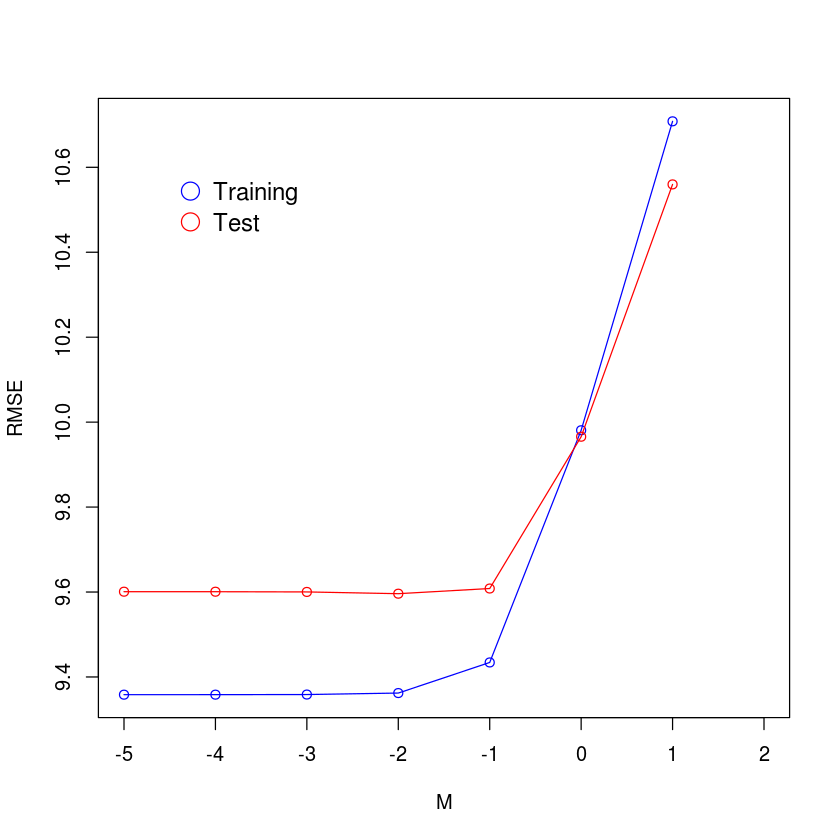

In [81]:
plot (x = df$M, y = df$Training, type='o', col='blue', xlab="M", ylab="RMSE")
lines(x = df$M,y = df$Test,type='o' ,col="red")
legend("topleft", 
  legend = c("Training", "Test"), 
  col = c("blue","red"), 
  pch = c(1,1), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

[1] 1e-05
[1] 1e-04
[1] 0.001
[1] 0.01
[1] 0.1
[1] 1
[1] 10
[1] 100


M,Training,Testing
-5,9.222957,10.35766
-4,9.223005,10.35760
-3,9.223488,10.35702
-2,9.228331,10.35134
-1,9.277509,10.30025
0,9.746067,10.12186
1,10.956531,10.51524
2,11.407882,10.80863


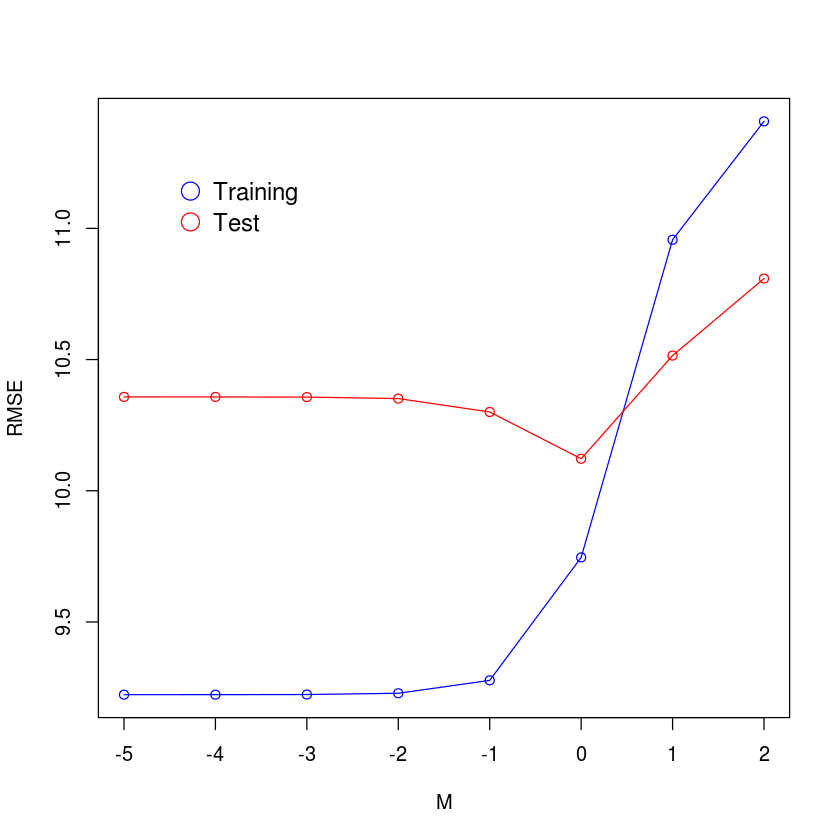

In [92]:
# 3

data = preprocess_data(msong_train, 500)
x_train = data$x_train
y_train = data$y_train
x_test = data$x_test
y_test = data$y_test
                   
df <- data.frame(M=integer(),
                 Training=double(), 
                 Testing=double())
                 

lambdas  = c(-5, -4, -3, -2, -1, 0, 1, 2)
for (i in 1:length(lambdas)){
    result =  train(x_train, y_train,lambda = lambdas[i] )
    df <-rbind(df, data.frame(M = lambdas[i], Training= result$train_RMSE, Testing=result$test_RMSE))
}
df
plot (x = df$M, y = df$Training, type='o', col='blue', xlab="M", ylab="RMSE")
lines(x = df$M,y = df$Test,type='o' ,col="red")
legend("topleft", 
  legend = c("Training", "Test"), 
  col = c("blue","red"), 
  pch = c(1,1), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))
                   

[1] 1e-05
[1] 1e-04
[1] 0.001
[1] 0.01
[1] 0.1
[1] 1
[1] 10
[1] 100


M,Training,Testing
-5,9.186699,9.996829
-4,9.186762,9.996773
-3,9.187394,9.996209
-2,9.193750,9.990715
-1,9.260179,9.948582
0,9.836077,9.990623
1,10.822315,10.554785
2,11.143176,10.814389


[1] 10.16111

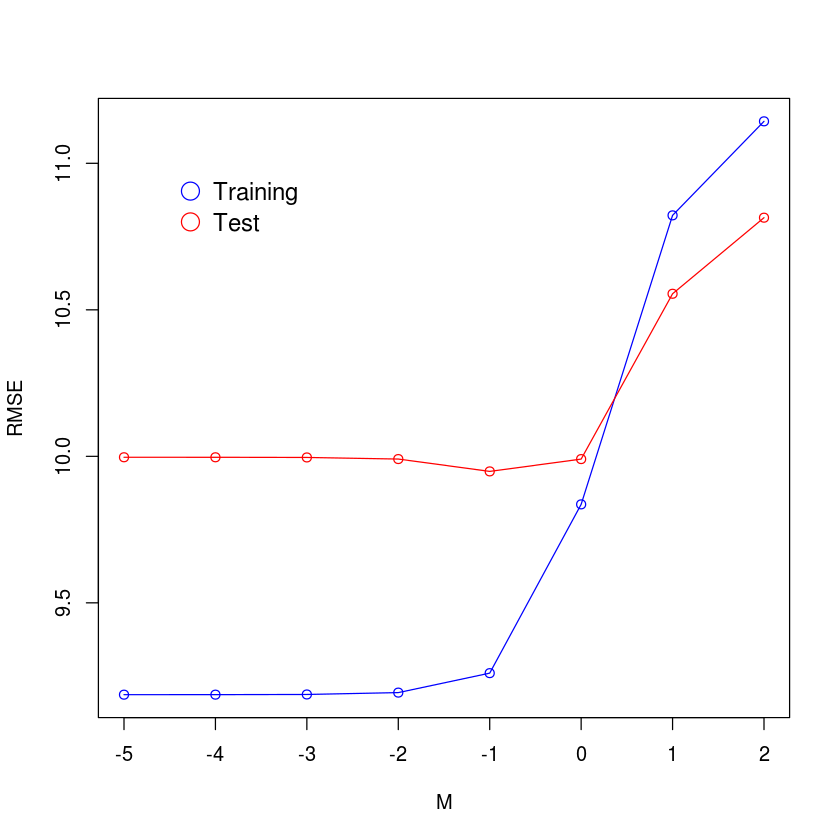

In [94]:

data = preprocess_data(msong_train, 1000)
x_train = data$x_train
y_train = data$y_train
x_test = data$x_test
y_test = data$y_test
                   
df <- data.frame(M=integer(),
                 Training=double(), 
                 Testing=double())
                 

lambdas  = c(-5, -4, -3, -2, -1, 0, 1, 2)
for (i in 1:length(lambdas)){
    result =  train(x_train, y_train,lambda = lambdas[i] )
    df <-rbind(df, data.frame(M = lambdas[i], Training= result$train_RMSE, Testing=result$test_RMSE))
}
df
mean(df$Test)
plot (x = df$M, y = df$Training, type='o', col='blue', xlab="M", ylab="RMSE")
lines(x = df$M,y = df$Test,type='o' ,col="red")
legend("topleft", 
  legend = c("Training", "Test"), 
  col = c("blue","red"), 
  pch = c(1,1), 
  bty = "n", 
  pt.cex = 2, 
  cex = 1.2, 
  text.col = "black", 
  horiz = F , 
  inset = c(0.1, 0.1))

In [113]:
x_train = msong_train[1:1000,2:ncol(msong_train)]
y_train = msong_train$year[1:1000]
x_test = msong_test[,2:ncol(msong_test)]
y_test = msong_test$year

org_year_mean =  mean(y_train)
y_train = y_train - org_year_mean                
y_test = y_test - org_year_mean





df <- data.frame(M=integer(),
                 Training=double(), 
                 Testing=double())
                 

lambdas  = c(-5:7)
for (i in 1:length(lambdas)){
    result =  train(x_train, y_train,lambda = lambdas[i], lr= 10 ** -10, epochs = 100 )
    df <-rbind(df, data.frame(M = lambdas[i], Training= result$train_RMSE, Testing=result$test_RMSE))
}
df
plot (x = df$M, y = df$Training, type='o', col='blue', xlab="M", ylab="RMSE")
lines(x = df$M,y = df$Test,type='o' ,col="red")
legend("topleft", legend = c("Training", "Test"),   col = c("blue","red"),   pch = c(1,1),   bty = "n", pt.cex = 2,   cex = 1.2,   text.col = "black",   horiz = F ,   inset = c(0.1, 0.1))




M,Training,Testing
-5,1.072318e+01,1.051386e+01
-4,1.072318e+01,1.051386e+01
-3,1.072318e+01,1.051386e+01
-2,1.072318e+01,1.051386e+01
-1,1.072318e+01,1.051386e+01
0,1.072318e+01,1.051386e+01
1,1.072319e+01,1.051386e+01
2,1.072328e+01,1.051389e+01
3,1.072425e+01,1.051423e+01
4,1.073383e+01,1.051776e+01


M,Training,Testing
-5,666.6516,706.6614
-4,666.6516,706.6614
-3,666.6516,706.6614
-2,666.6516,706.6615
-1,666.6516,706.6615
0,666.6519,706.6618
1,666.6551,706.6651
2,666.6869,706.6981
3,667.0048,707.0282
4,670.2106,710.3751


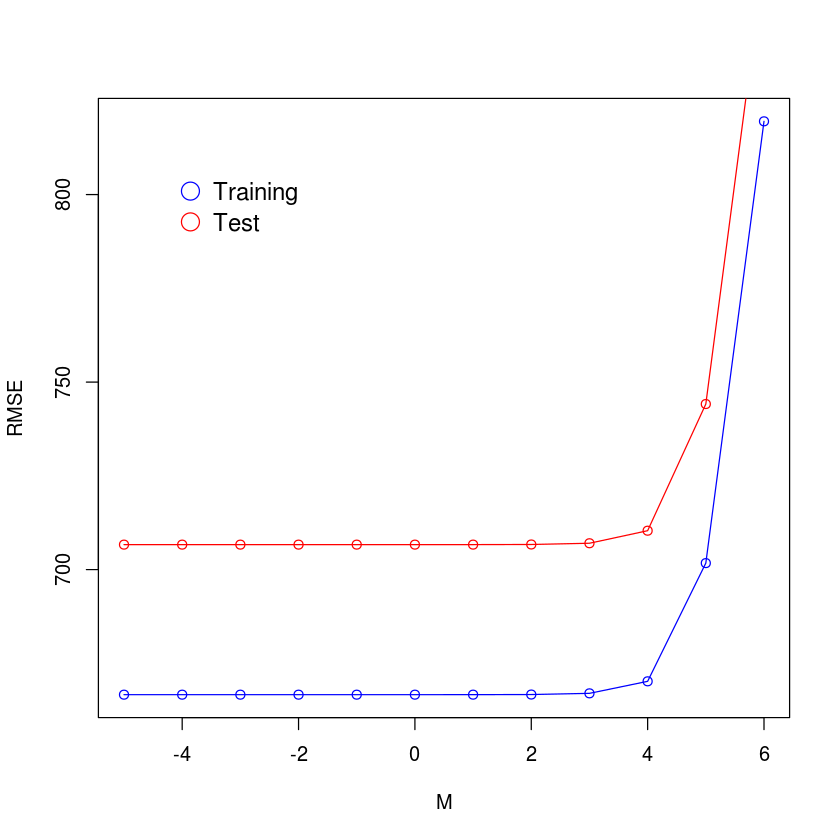

In [119]:
x_train = msong_train[1:1000,2:ncol(msong_train)]
y_train = msong_train$year[1:1000]
x_test = msong_test[,2:ncol(msong_test)]
y_test = msong_test$year

df <- data.frame(M=integer(),
                 Training=double(), 
                 Testing=double())
                 
lambdas  = c(-5:6)
for (i in 1:length(lambdas)){
    result =  train(x_train, y_train,lambda = lambdas[i], lr= 10 ** -10, epochs = 100 )
    df <-rbind(df, data.frame(M = lambdas[i], Training= result$train_RMSE, Testing=result$test_RMSE))
}
df
plot (x = df$M, y = df$Training, type='o', col='blue', xlab="M", ylab="RMSE")
lines(x = df$M,y = df$Test,type='o' ,col="red")
legend("topleft", legend = c("Training", "Test"),   col = c("blue","red"),   pch = c(1,1),   bty = "n", pt.cex = 2,   cex = 1.2,   text.col = "black",   horiz = F ,   inset = c(0.1, 0.1))
